### ensumble

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
lgbm_out = pd.read_csv('../output/baseline_21.csv').rename(columns={'likes': 'lgbm'})
cat_out = pd.read_csv('../output/catboost_2.csv').rename(columns={'likes': 'cat'})
print(lgbm_out.shape)
print(cat_out.shape)

(12008, 1)
(12008, 1)


In [3]:
lgbm_out

,lgbm
0,1.360859
1,24.454466
2,0.525885
3,4.970818
4,0.190568
...,...
12003,0.124610
12004,0.014005
12005,0.351834
12006,0.133069


In [4]:
cat_out

,cat
0,1.481155
1,24.773079
2,0.581349
3,4.025066
4,0.232092
...,...
12003,0.080081
12004,0.000000
12005,0.358903
12006,0.061061


In [5]:
ensumble = pd.concat([lgbm_out, cat_out], axis=1)
ensumble.corr()

,lgbm,cat
lgbm,1.000000,0.946655
cat,0.946655,1.000000


In [6]:
x0= ensumble['lgbm']
y0 = ensumble['cat']
x1= np.log1p(x0)
y1 = np.log1p(y0)

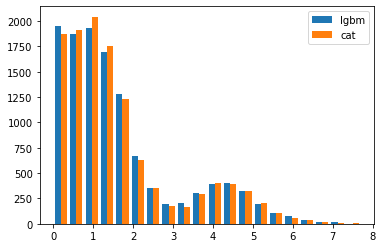

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist([x1, y1], bins=20, label=['lgbm', 'cat'])
ax.legend()

In [8]:
def plot_scatter(x, y, xlabel, ylabel):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y, alpha=0.5)
    ax.plot(x, x, color='black', linewidth=0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    maxvalue = max(x.max(), y.max())*1.05
    plt.xlim(0, maxvalue)
    plt.ylim(0, maxvalue)

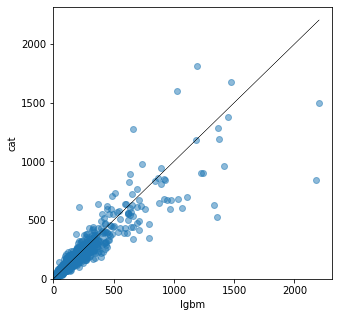

In [9]:
plot_scatter(x0, y0, 'lgbm', 'cat')

In [10]:
lgbm_rate = 0.7

In [11]:
ensumble['likes'] = (ensumble['lgbm']*lgbm_rate + ensumble['cat']*(1-lgbm_rate))
gsales = ensumble.drop(columns=['lgbm', 'cat'])
gsales.to_csv('../output/ensumble_5.csv', index=False)

In [12]:
gsales

,likes
0,1.396948
1,24.550050
2,0.542524
3,4.687092
4,0.203025
...,...
12003,0.111252
12004,0.009804
12005,0.353955
12006,0.111467


#### ensumble_5
- baseline_21 = 0.7
- catboost_2 = 0.3
- LB = 0.9484 ★best★

#### ensumble_4
- baseline_21 = 0.9
- catboost_2 = 0.1
- LB = 0.9490

#### ensumble_3
- baseline_21 = 0.8
- catboost_2 = 0.2
- LB = 0.9485

#### ensumble_2
- baseline_21 = 0.5
- catboost_2 = 0.5
- LB = 0.9491

#### ensumble_1
- baseline_21 = 0.5
- catboost_1 = 0.5
- LB = 0.9497